## Titanic_Analysis_Basic

Check out the Data Set at the following link:
https://www.kaggle.com/c/titanic-gettingStarted

Download the train.csv file and save it to the same location as your iPython Notebooks.

In [1]:
# Import the packages
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# Set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

# General review of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check data_type and size
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Some basic questions have to know fist:

1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Maybe think more:
 - What factors helped someone survive the sinking?


In [4]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First let's look at gender:

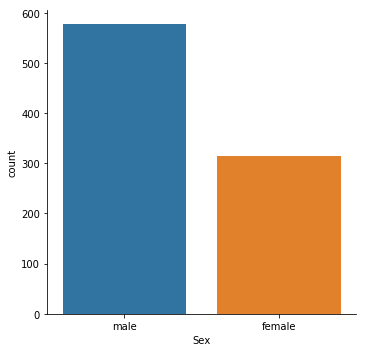

In [7]:
sns.catplot('Sex',data=titanic_df,kind="count")
# You can also change your preference of color by passing the argument【 palette='winter'】or 【 palette='summer'】
# eample ： sns.catplot('Sex',data=titanic_df,kind="count",palette='winter')

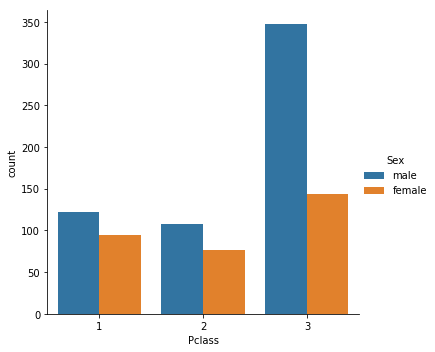

In [82]:
# We can seperate the genders by classes, using the 'hue' arguement !
sns.catplot('Pclass',data=titanic_df,kind="count",hue='Sex')

Well, it seems that there are more males and child in the 3rd class than females. Also,it might be useful to know the split between males,females,and children. 

We treat anyone as under 16 as a child, here we use the apply function to create a new column named ['person'] based on Sex, Age

In [9]:
# There are also other more simple ways to realize it
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', add axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [10]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Success ! 
Now we have seperated the passengers between female,male,and child.Now it's time to prove  the famous "Women and children first policy"  ^.^

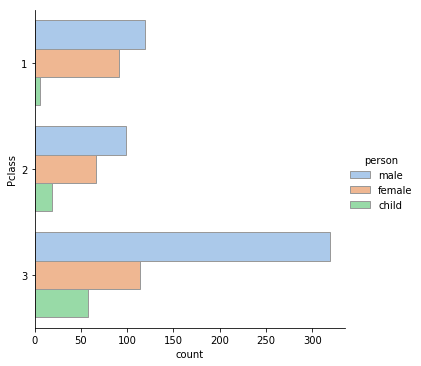

In [79]:
# Using the carplot again!
#sns.catplot('Pclass',data=titanic_df,kind='count',hue='person')
sns.catplot(y="Pclass", hue="person", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic_df)

It's much better to see the bigger picture via swarm graph

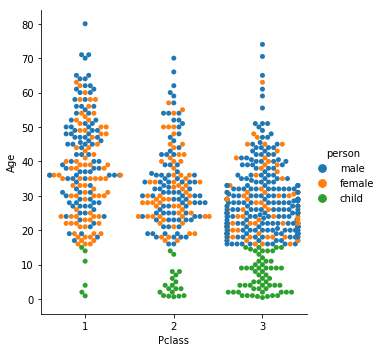

In [133]:
sns.catplot(x='Pclass', y='Age',hue="person",aspect=.90,kind="swarm", data=titanic_df)

There are more children in the 3rd class, not so many in the 1st class, we need a distribution here to get a more precise picture

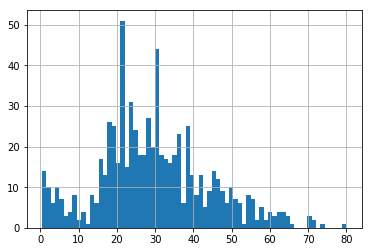

In [29]:
# A histogram of Age with pandas
titanic_df['Age'].hist(bins=70)

In [31]:
# A quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

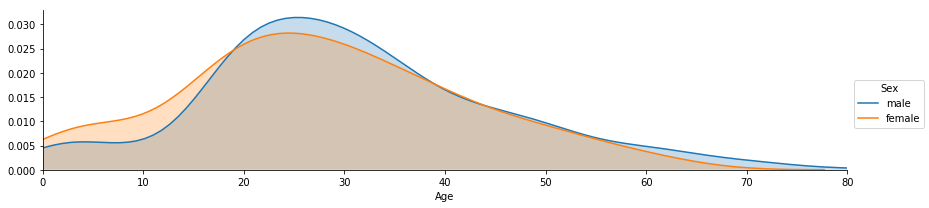

In [32]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

Here we get the distribution of age by sex, we'll do the same thing for column "person" and "Pclass"

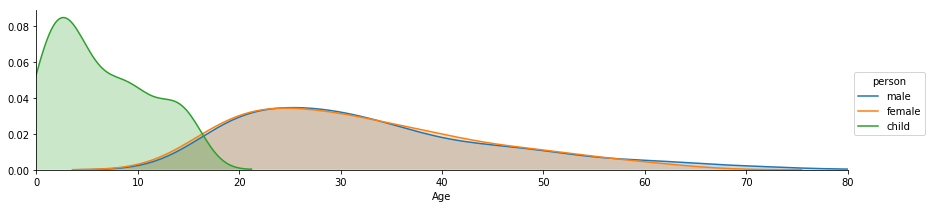

In [33]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

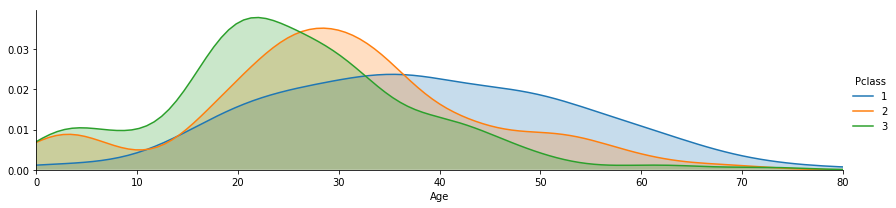

In [43]:
# Let's do the same for class by changing the hue argument
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

So far, we have answered the first question, we know who are the passengers based on Sex，Age，Class, we can continue to the second question: What deck were the passengers on and how does that relate to their class?

In [23]:
# Quick review of our dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [16]:
# Drop the Null values of the column "Cabin", name it "deck"
deck = titanic_df['Cabin'].dropna()

In [24]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [25]:
# We can find out that there are 687 missing values for the column "Cabin"
titanic_df.shape[0]-deck.shape[0]

687

We only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

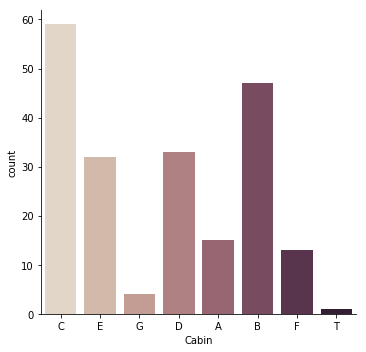

In [83]:
#let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,kind="count",palette="ch:.25")

We can notive that there is  a 'T' deck value there which doesn't make sense, we can drop it out

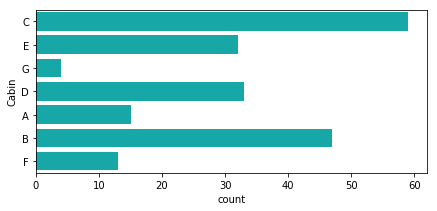

In [108]:
# Redefine cabin_df  where the row doesn't equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
#sns.catplot('Cabin',data=cabin_df,kind="count",palette='summer')
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Cabin", data=cabin_df, color="c");


Note that we can use 'summer_d' or 'winter_d' to make the color darker,now that we've analyzed the distribution by decks, more survivors from deck B and C, now we continue to the third question:

3.) Where did the passengers come from?

In [46]:
titanic_df.Embarked.dropna().value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

If we look into the Embarked column in the dataset, we can see only there are only three values : S,C,Q, which stands for Cherbourg, Queenstown, Southhampton

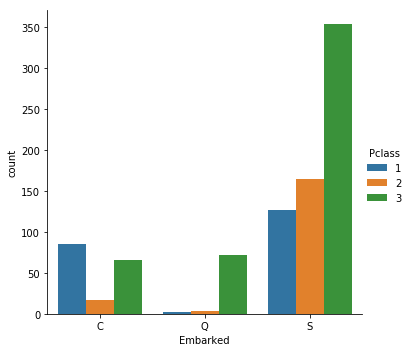

In [54]:
#Now we can make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values

sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind="count",order=['C','Q','S'])

Compared with other 2 places, we can notice that almost all the passagers from Queenstown that boarded 3rd class,
In order to find out the raison behind it, maybe we can search some economic data, distribution of social class... of Queenstown in that time

Now let's take a look at the last question:

4.) Who was alone and who was with family?

In [56]:
# First of all, we can add a new column to define alone
# We'll add the parent/child column with the sibsp column to calculate the total number of one's relatives
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [57]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\yaozeliang\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
# Check the dataframe after the modification
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


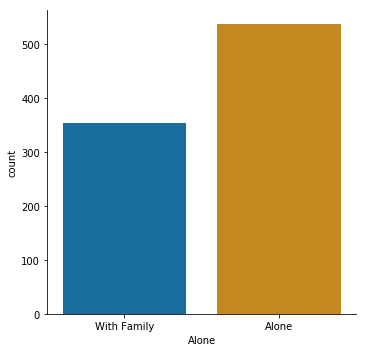

In [67]:
# Now let's get a simple visualization!
# There so many color palettes to choose, see more : "https://seaborn.pydata.org/tutorial/color_palettes.html"
sns.catplot('Alone',data=titanic_df,kind="count",palette='colorblind')

So far we already got some basic information from the dataset, now it's time to think a little more:
What factors helped someone survive the sinking?

Since we know that in the column "Survived",0 stands for No,1 stands for yes,we can use map to change this column

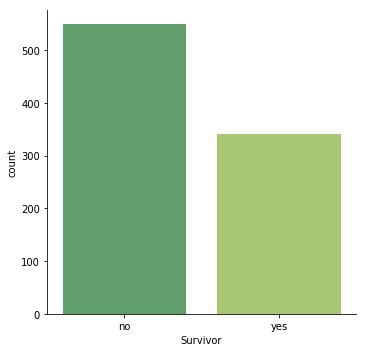

In [85]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
sns.catplot('Survivor',data=titanic_df,kind="count",palette='summer')

It seems that more people died than those who survived. 
Let's see if the class has an effect on their survival rate

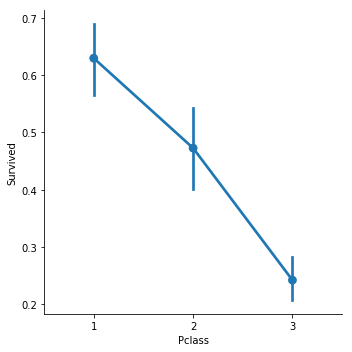

In [98]:
sns.catplot('Pclass','Survived',kind="point",data=titanic_df)

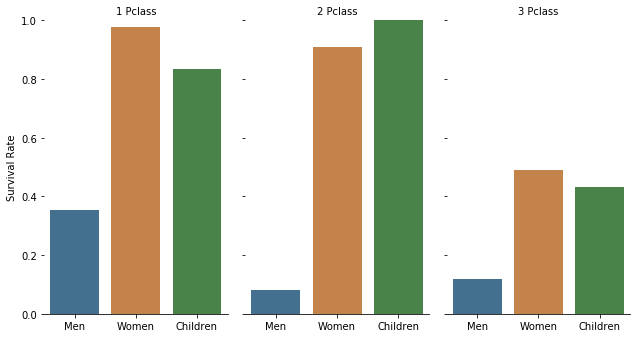

In [112]:
g = sns.catplot(x="person", y="Survived", col="Pclass",
                 data=titanic_df, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
.set_xticklabels(["Men", "Women", "Children"])
.set_titles("{col_name} {col_var}")
.set(ylim=(0, 1))
.despine(left=True))

It looks like survival rates for the 3rd class are much more lower than 1st and 2nd.
But maybe this effect is caused by the large amount of men in the 3rd class in combination with the women and children first policy. 
Let's use 'hue' to get a clearer picture on this.


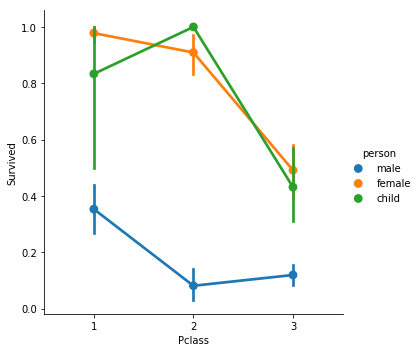

In [100]:
sns.catplot('Pclass','Survived',hue='person',kind="point",data=titanic_df)

From the result we know either being a male or being in 3rd class has lower rate of survival. But what about age? Did being younger or older have an effect on survival rate?

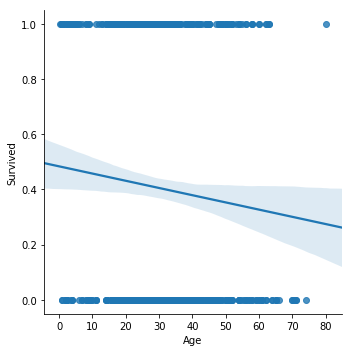

In [101]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)

Maybe it's more clear with a Hexbin plot!

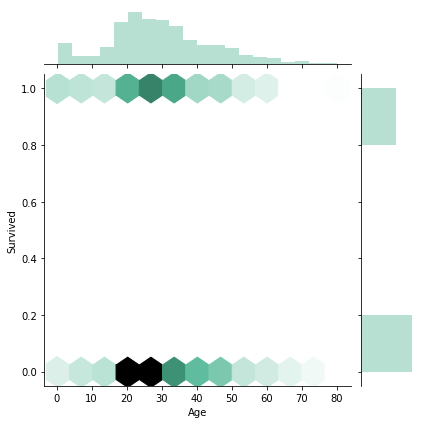

In [121]:
sns.jointplot('Age','Survived',data=titanic_df, kind="hex", color="#4CB391")

General trend is that the older the passenger was, the less likely they survived. Also we can find out that the average age range is between 20 and 40

Now we use hue to take a look at the effect of class and age.

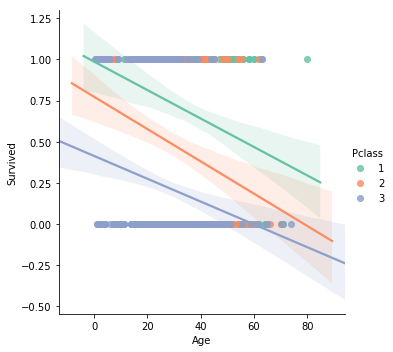

In [105]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='Set2')

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

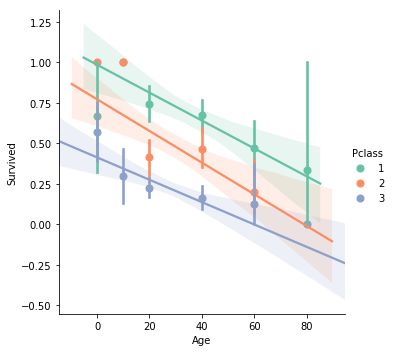

In [106]:
generations=[0,10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='Set2',x_bins=generations)

Inseresting to find older 1st class passengers, higher survival rate ! What about if we relate gender and age with the survival set?

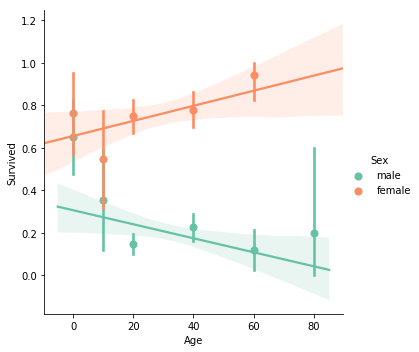

In [107]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='Set2',x_bins=generations)

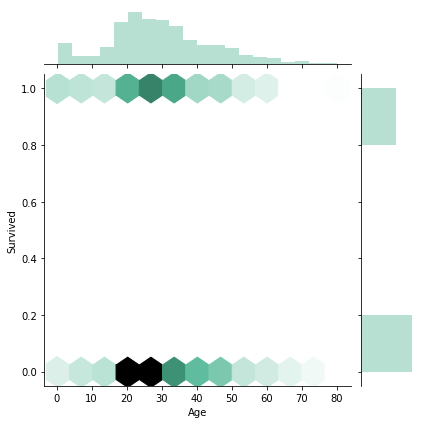

In [120]:
sns.jointplot('Age','Survived',data=titanic_df, kind="hex", color="#4CB391")

In [ ]:
Just like what we thought, women and children first, some brilliance of human nature here !